In [ ]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer

**Importing data from github repo**

In [ ]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

Visualizing the Data Imported

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Converting the Categorigal Data into one hot encoded form and Visualizing it

In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Creating the features data

In [ ]:
X=insurance_one_hot.drop(columns="charges")
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


Creating the Label Data

In [ ]:
y=insurance_one_hot['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Visualizing the Features

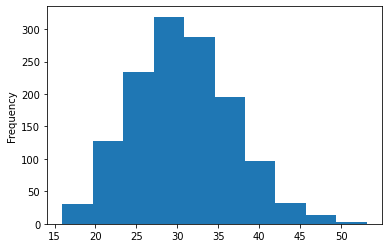

In [ ]:
X['bmi'].plot(kind='hist')

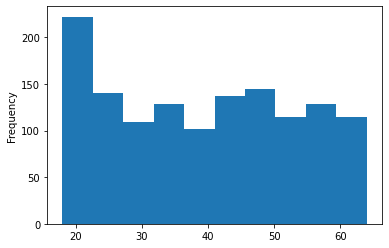

In [ ]:
X['age'].plot(kind='hist')

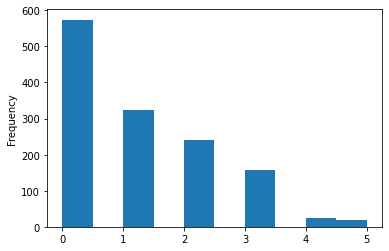

In [ ]:
X['children'].plot(kind='hist')

Splitting the Data into training and testing Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Checking the length of Training and Testing Data
len(X_train),len(X_test),len(X)

(1070, 268, 1338)

Generating a Simple model first

In [ ]:
#Setting the random seed
tf.random.set_seed(42)

#Creating the model
insurance_model=tf.keras.Sequential([
                          
                           tf.keras.layers.Dense(1)
])

#Compiling the model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')

#Fitting the model
history=insurance_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
34/34 [==============================] - 0s 808us/step - loss: 12936.5752 - mae: 12936.5752
Epoch 2/10
34/34 [==============================] - 0s 834us/step - loss: 12091.7373 - mae: 12091.7373
Epoch 3/10
34/34 [==============================] - 0s 883us/step - loss: 11264.6709 - mae: 11264.6709
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 10507.7217 - mae: 10507.7217
Epoch 5/10
34/34 [==============================] - 0s 993us/step - loss: 9859.0068 - mae: 9859.0068
Epoch 6/10
34/34 [==============================] - 0s 771us/step - loss: 9310.6611 - mae: 9310.6611
Epoch 7/10
34/34 [==============================] - 0s 882us/step - loss: 8837.3008 - mae: 8837.3008
Epoch 8/10
34/34 [==============================] - 0s 963us/step - loss: 8451.8438 - mae: 8451.8438
Epoch 9/10
34/34 [==============================] - 0s 787us/step - loss: 8146.1074 - mae: 8146.1074
Epoch 10/10
34/34 [==============================] - 0s 876us/step - loss: 7902.5376 

Evaluating the Model

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7728.6572 - mae: 7728.6572


[7728.6572265625, 7728.6572265625]

Plotting the learning Curve of the model

Text(0.5, 0, 'epochs')

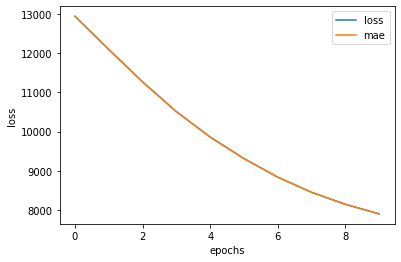

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Improving Our model by

1.  Adding more layers
2.  Increasing the number of units in each layer (except for the output layer).
3.  Using Adam optimizer instead of SGD
4. Training it for longer Epochs=100 instead of 10

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

Evaluating the Model

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

Plotting the Loss curve of 2nd Model

Text(0.5, 0, 'epochs')

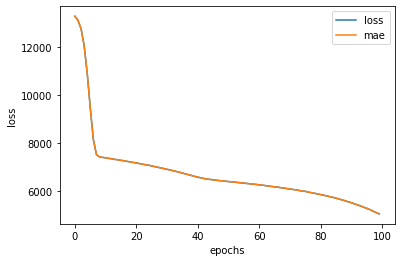

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Normalizing the Data

In [ ]:
# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


Fitting the Model on Normalized Data

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

Evaluating the model 3

In [ ]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]

Plot learning Curve or Loss Curve

Text(0.5, 0, 'epochs')

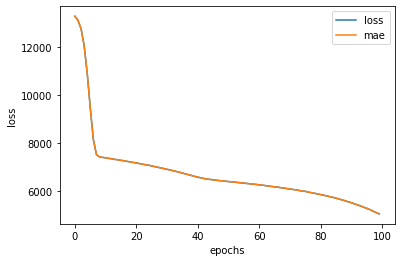

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Plot the Prediction Curve

In [ ]:
#predicting our data using our final model
y_preds=insurance_model_3(X_test_normal)

In [ ]:
def plot_predictions( 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots Prediction data, test data.
  """
  
  plt.plot(test_labels, c="r", label="True Data")
  plt.plot(predictions,c='g',label="Prediction")
  # Show the legend
  plt.legend();

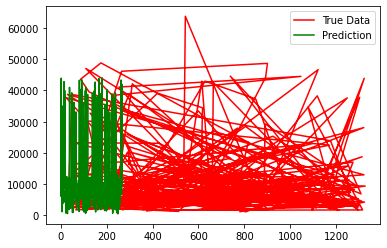

In [ ]:
plot_predictions(y_test,y_preds)